# 데이터 준비

In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/titanic')

In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [4]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [6]:
train['Survived'].groupby(train['Sex']).value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

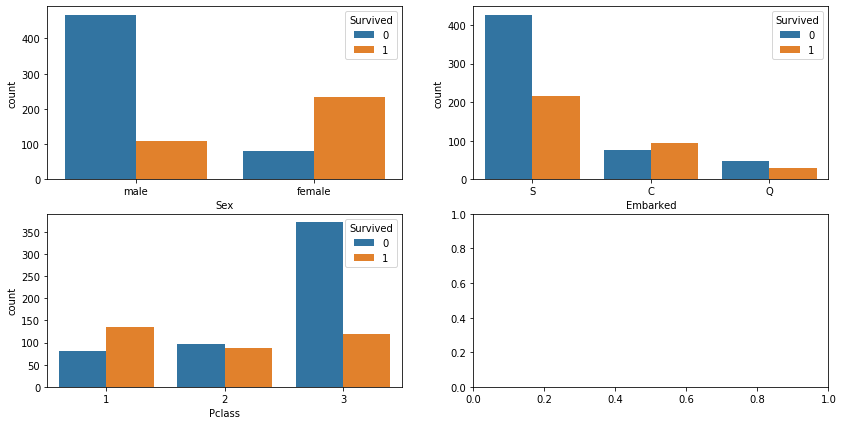

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(14,7))

a= sns.countplot(train['Sex'],hue=train['Survived'],ax=ax1)
# rects = a.patches
# labels = 

# for rect,label in zip(rects,labels):
#     height = rect.get_height()
#     a.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')


sns.countplot(train['Embarked'],hue=train['Survived'],ax=ax2)
sns.countplot(train['Pclass'],hue=train['Survived'],ax=ax3)

## Survived

In [8]:
# 생존하고 죽은 사람 수
print(train['Survived'].value_counts())
survived = train['Survived']==1
no_survived= train['Survived']==0

0    549
1    342
Name: Survived, dtype: int64


In [9]:
# 생존, 사망자 비율
len(train[survived])/len(train), len(train[no_survived])/len(train)

(0.3838383838383838, 0.6161616161616161)

## 가족,형제,부모,자식
- 혈연이 있는 인원이 더 많이 죽었는지

In [10]:
print(train['SibSp'].value_counts())
print(train['Parch'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


- 0이 많고 1 이상은 비슷하니 혈연이 있는지 없는지로 나눔

In [11]:
# 혈연이 있는 사람 수
len(train.loc[(train['SibSp']!=0) | (train['Parch']!=0)])

354

In [0]:
#혈연 데이터 추가 
train['no_kindred'] = (train['SibSp'] ==0 ) &(train['Parch'] ==0)
train['no_kindred'] = train['no_kindred'].astype(int)

test['no_kindred'] = (test['SibSp'] ==0 ) &(test['Parch'] ==0)
test['no_kindred'] = test['no_kindred'].astype(int)

In [13]:
train['Survived'].groupby(train['no_kindred']).value_counts()

no_kindred  Survived
0           1           179
            0           175
1           0           374
            1           163
Name: Survived, dtype: int64

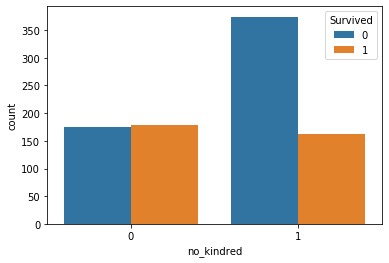

In [14]:
# 0: 혈연이 있는 인원 1: 혈연이 없는 인원
sns.countplot(data=train,x='no_kindred',hue='Survived')

In [15]:
train.loc[train['Age']<=15,'Survived'].value_counts()

1    49
0    34
Name: Survived, dtype: int64

나이가 어린 인원

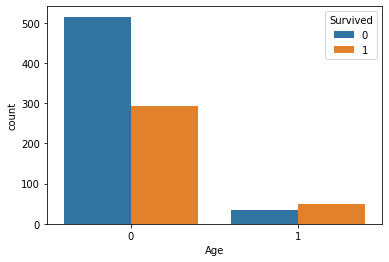

In [16]:

sns.countplot(data=train,x=(train['Age']<=15).astype(int),hue='Survived')

eda 결과 
- 혈연이 없는데 죽은 사람의 숫자가 더 많다.
- 오히려 생존자 중에 혈연이 있는 사람의 비율이 더 높다.

컬럼 추가
- no_kindred : 혈연이 없으면 1, 있으면 0


## class
- 1등석이 많이 살았는지


http://rpmarchildon.com/wp-content/uploads/2018/06/titanic_class_cabin_locations.png

In [0]:
fst = train['Pclass'] ==1
snd=  train['Pclass'] ==2
thd = train['Pclass'] ==3

t_fst = test['Pclass'] == 1
t_snd = test['Pclass'] == 2
t_thd = test['Pclass'] == 3

In [18]:
len(train[fst]),len(train[snd]),len(train[thd])

(216, 184, 491)

In [19]:
train['Survived'].groupby(train['Pclass']).value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

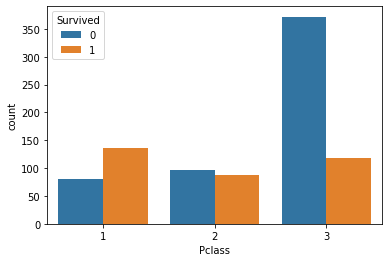

In [20]:
sns.countplot(data= train,x= 'Pclass',hue='Survived')

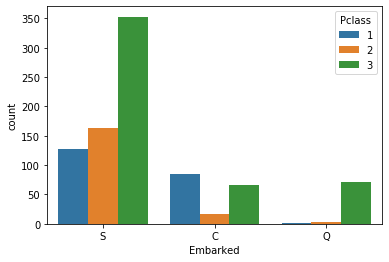

In [21]:
# 선착장별 pclass 탑승 인원
sns.countplot(data= train,x= 'Embarked',hue='Pclass')

나이 결측치 제거 

In [22]:
train['Age'].isnull().sum()

177

In [23]:
train.loc[train['Age'].isnull(),'Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [0]:
# age 결측치는 의미를 부여하는게 좋을 것 같으니 값 100으로 채움. 
train['Age']=train['Age'].fillna(100)
test['Age']=test['Age'].fillna(100)

- 나이가 결측치인 인원은 사망자가 많은 편이다.  


1등석 중에서도 죽은 사람

In [25]:
a= train[fst]
a['Survived'].groupby(a['Sex']).value_counts()

Sex     Survived
female  1           91
        0            3
male    0           77
        1           45
Name: Survived, dtype: int64

- 1등석이라도 남성은 많이 죽었다.

남성 중 생존한 사람


In [41]:
len(train[male & survived])

109

총 남성 생존자 :109명
- 45명 1등석 남성
- 47명 3등석 남성
- 17명 2등석 남성


1등석 남성 생존자

43


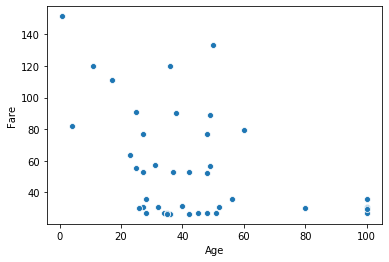

In [0]:
a= train[fst & male & survived & (train['Fare']<=200)]
print(len(a))
sns.scatterplot(data=a,x='Age',y='Fare')

In [0]:
train[fst & male & survived]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,thd_female
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S,1,0
55,56,1,1,"Woolner, Mr. Hugh",male,100.00,0,0,19947,35.5000,C52,S,1,0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C,0,0
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.00,0,0,111428,26.5500,NaN,S,1,0
209,210,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,A31,C,1,0
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.00,1,0,19943,90.0000,C93,S,0,0
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S,0,0
298,299,1,1,"Saalfeld, Mr. Adolphe",male,100.00,0,0,19988,30.5000,C106,S,1,0
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0,0
370,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,55.4417,E50,C,0,0


In [0]:
a= train[fst & male & survived]
a['Fare'].min()

26.2875

In [0]:
a= train[fst & male & (train['Fare']>=26.2875)]
a['Survived'].value_counts()

0    67
1    45
Name: Survived, dtype: int64

In [0]:
train['f26_fstm'] = (fst & male & (train['Fare']>=26.2875)).astype(int)
test['f26_fstm'] = (t_fst & t_male & (test['Fare']>=26.2875)).astype(int)


3 등석 중에서도 생존한 남성

47


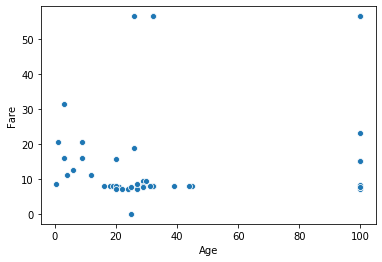

In [0]:
a= train[thd & male & survived]
print(len(a))
sns.scatterplot(data=a,x='Age',y='Fare')

In [0]:

b= a[a['Age']>=18]
print(len(b))
b

37


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,thd_female,f26_fstm
36,37,1,3,"Mamee, Mr. Hanna",male,100.0,0,0,2677,7.2292,NaN,C,1,0,0
65,66,1,3,"Moubarek, Master. Gerios",male,100.0,1,1,2661,15.2458,NaN,C,0,0,0
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1,0,0
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S,1,0,0
107,108,1,3,"Moss, Mr. Albert Johan",male,100.0,0,0,312991,7.7750,NaN,S,1,0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,1,0,0
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,1,0,0
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S,1,0,0
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,1,0,0
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S,0,0,0


In [0]:
a= train[thd & male &  (train['Age']>=18) & (train['no_kindred']==1)& (train['Fare']<=20)]
a['Survived'].value_counts()

0    218
1     26
Name: Survived, dtype: int64

2등석 생존한 남성

17


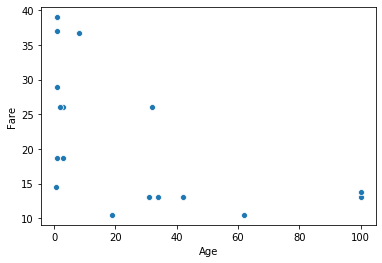

In [0]:
a= train[snd & male & survived]
print(len(a))
sns.scatterplot(data=a,x='Age',y='Fare')

In [0]:
a= train[snd & male  & (train['Fare']>=10) & (train['Fare']<=40) & (train['Age']<=15)]
a['Survived'].value_counts()

1    9
Name: Survived, dtype: int64

In [0]:
train['sndm_a15_f10'] = (snd & male  & (train['Fare']>=10) & (train['Fare']<=40) & (train['Age']<=15)).astype(int)

test['sndm_a15_f10'] = (snd & male  & (test['Fare']>=10) & (test['Fare']<=40) & (test['Age']<=15)).astype(int)

In [0]:
print(train.shape,test.shape)

(891, 15) (418, 14)


EDA 결과
- 3등석 중에서도 생존한 남성의 과반수는 특별한 특징을 잡을 수 없다.
- 1등석 생존한 남성들은 요금을 최소 26달러 이상을 지불했다.


컬럼 추가
- f26_fstm : 요금26달러 이상 낸 1등석 남성
- sndm_a15_f10 : 요금10달러 이상 40달러 이하, 나이 15세 이하, 2등석의 남성

## 비용



나이와 비용의 관계

In [0]:
a =train[train['Fare'] <= 60]

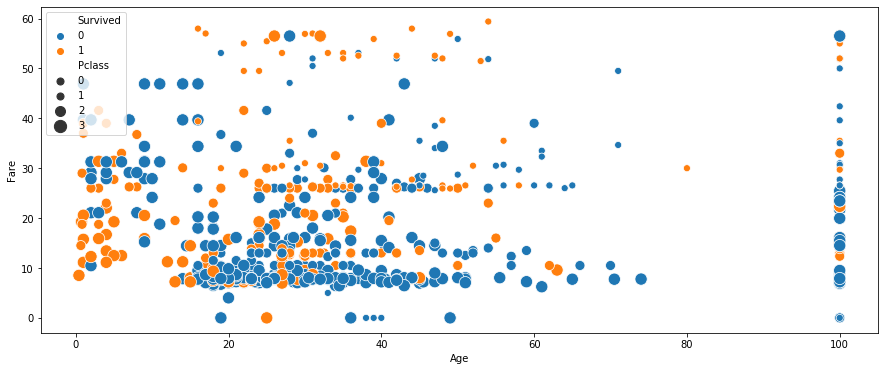

In [0]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=a,x='Age',y='Fare',hue='Survived',size='Pclass',sizes=(50,150))

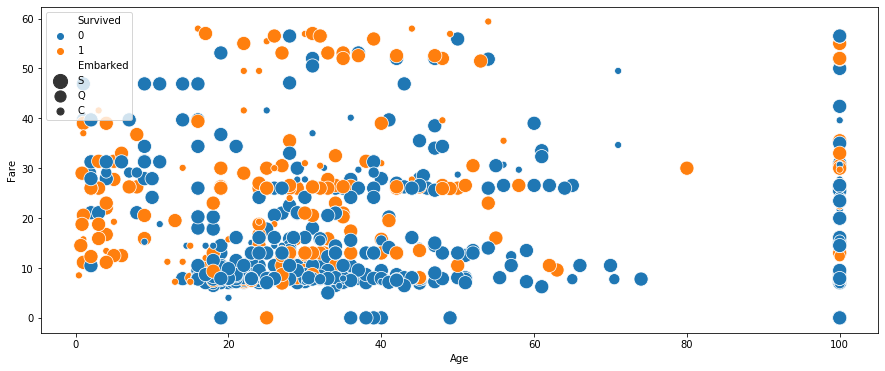

In [0]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=a,x='Age',y='Fare',hue='Survived',size='Embarked',sizes=(50,200),)

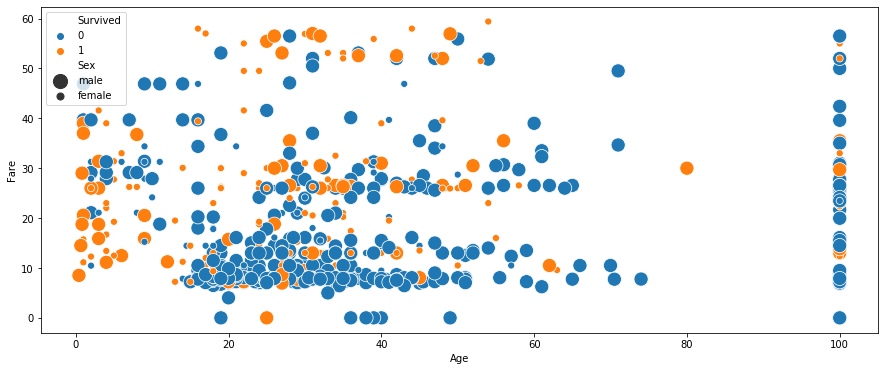

In [0]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=a,x='Age',y='Fare',hue='Survived',size='Sex',sizes=(50,200))

비용을 많이 낸 사람은 살았는지


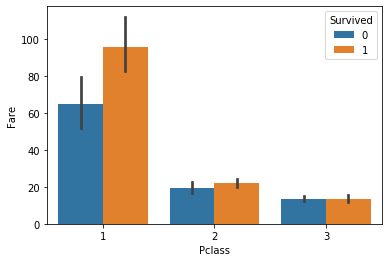

In [0]:
sns.barplot(data =train,x='Pclass',y='Fare',hue='Survived')

- 1등석이 평균적으로 많이 냈다. 1등석 중에서도 생존자가 비용을 더 많이 냈다.
- 2등석도 생존자가 비용을 조금 더 냈다.
- 3등석은 큰 차이가 없는 듯

In [0]:
a= train[(train['Pclass']==1) & (train['Survived']==1) ]
print(a['Fare'].max())
print(a['Fare'].min())
# 1등석 생존자의 요금 편차가 심함

512.3292
25.9292


In [0]:
# 1등석 생존자의 비용의 중앙치 값
train.loc[fst & survived,['Fare']].median()

Fare    77.9583
dtype: float64

In [0]:
# 1등석 사망자의 비용 중앙치 값
train.loc[fst & no_survived,['Fare']].median()

Fare    44.75
dtype: float64

In [0]:
# 2등석 생존자 비용 평균
train.loc[snd & survived,['Fare']].mean()

Fare    22.0557
dtype: float64

In [0]:
# 2등석 사망자 비용 평균
train.loc[snd & no_survived,['Fare']].mean()

Fare    19.412328
dtype: float64

In [0]:
# 요금의  평균: 32
train['Fare'].mean()

32.2042079685746

In [0]:
train['f50&a10'] = (train['Fare']<=50) & (train['Age'] >10)
train['f50&a10']= train['f50&a10'].astype(int)

test['f50&a10'] = (test['Fare']<=50) & (test['Age'] >10)
test['f50&a10']= test['f50&a10'].astype(int)

In [0]:
print(train.shape)

(891, 16)


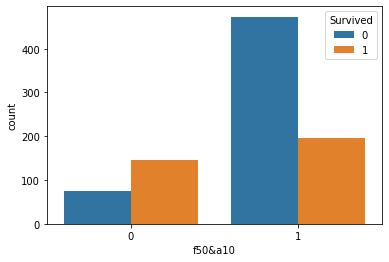

In [0]:
# 1: 요금 50이하,나이11세이상, 0: 그렇지 않은 인원
sns.countplot(data=train,x='f50&a10',hue='Survived')

eda 결과
- 돈 많이 낸 사람이 많이 살아남았다
- 어린 인원은 돈을 많이 안냈어도 많이 살아남았다.

컬럼 추가
- f50&a10 : 요금50이하 이면서 나이 11살 이상인 인원

## 선착장
- S 선착장에서 탄 사람이 다른 선착장에서 탄 사람보다 많이 죽었는지


선착장 별 생존,사망자 수

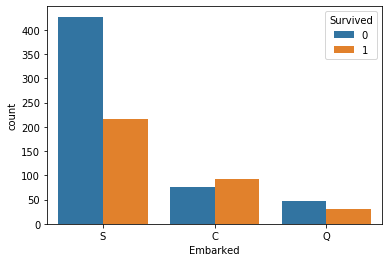

In [0]:
sns.countplot(data = train, x= 'Embarked',hue='Survived')

In [0]:
S = train['Embarked']=='S'
Q = train['Embarked'] =='Q'
C = train['Embarked']=='C'

t_S = test['Embarked']=='S'
t_Q = test['Embarked'] =='Q'
t_C = test['Embarked']=='C'

In [0]:
len(train[S]),len(train[C]),len(train[Q])

(644, 168, 77)

In [0]:
print('S 에서 탄 인원 중 죽은사람 비율',len(train[no_survived & S])/len(train[S]))
print('C 에서 탄 인원 중 죽은사람 비율',len(train[no_survived & C])/len(train[C]))
print('Q 에서 탄 인원 중 죽은사람 비율',len(train[no_survived & Q])/len(train[Q]))

S 에서 탄 인원 중 죽은사람 비율 0.6630434782608695
C 에서 탄 인원 중 죽은사람 비율 0.44642857142857145
Q 에서 탄 인원 중 죽은사람 비율 0.6103896103896104


In [0]:
print('전체 사망자 중 S에서 탄 사람 비율:',len(train[no_survived & S])/len(train[no_survived]))
# len(train[no_survived & C])/len(train[no_survived])
# len(train[no_survived & Q])/len(train[no_survived])

전체 사망자 중 S에서 탄 사람 비율: 0.7777777777777778


선착장별 pclass 탑승 인원

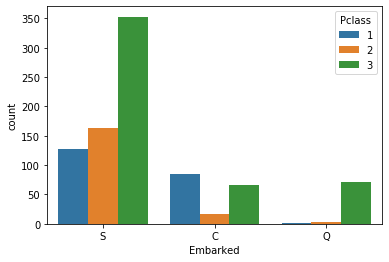

In [0]:
sns.countplot(data= train,x= 'Embarked',hue='Pclass')

In [0]:
a= train[C]
a['Survived'].groupby(a['Pclass']).value_counts()


Pclass  Survived
1       1           59
        0           26
2       1            9
        0            8
3       0           41
        1           25
Name: Survived, dtype: int64

선착장 별 성별 수

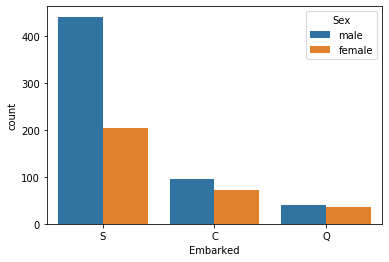

In [0]:
sns.countplot(data = train, x= 'Embarked',hue='Sex')

- 대체적으로 남성이 많이 탑승했다. 그 중 S가 남성의 비율이 많이 높다.

In [0]:
len(train[S & no_survived & female]),len(train[S & survived & female])

(63, 140)

- S선착장의 여성은 63명이 사망했고 140명이 생존했다.

In [0]:
len(train[S & no_survived & female & thd])

55

In [0]:
len(train[S & no_survived & male]),len(train[S & survived & male])

(364, 77)

- S선착장의 남성은 364명이 사망했지만 77명의 생존자가 있다. 

S 선착장의 생존한 남성

In [0]:
surv_s_male= train[S & survived & male]
# fst,snd = 44, thd =34
surv_s_male

NameError: ignored

In [0]:
len(surv_s_male[(surv_s_male['Age']> 20 )& (surv_s_male['no_kindred'] ==0)])

10

In [0]:
surv_s_male['no_kindred'].value_counts()

1    48
0    29
Name: no_kindred, dtype: int64

In [0]:
surv_s_male['Pclass'].value_counts()

3    34
1    28
2    15
Name: Pclass, dtype: int64

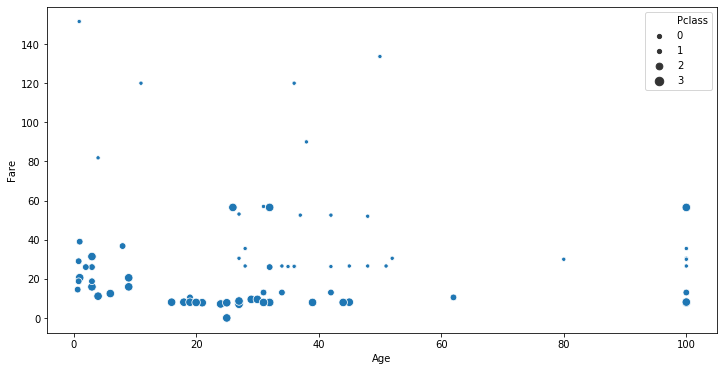

In [0]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=surv_s_male,x= 'Age',y='Fare',size = 'Pclass')

3가지 군집이 있는 듯 보인다.
- 10세 이하에 생존자가 몰려있는 경우가 있다. 아이의 경우 생존가능성이 높다.
- 20 이상 60 이하의 요금 영역에 1등석 생존자가 있다. 1등석이라 생존 가능성이 높다.
- 20 이하의 금액을 낸 3등석 생존자가 있다. 

In [0]:
# 10세 이하의 생존자 수. 
len(surv_s_male[(surv_s_male['Age'] <=10) ])

NameError: ignored

In [0]:
# 20 이하의 요금을 낸 3등석 생존자 수
len(surv_s_male[(surv_s_male['Age']> 10) & (surv_s_male['Fare']<=20)])

28

In [0]:
surv_s_male[(surv_s_male['Age']> 10) & (surv_s_male['Fare']<=20)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,fst&snd_female,f50&a10,embark_s,embark_q,embark_c,Pclass_1,Pclass_2,Pclass_3,fst_female,thd_female
17,18,1,2,"Williams, Mr. Charles Eugene",0,100.0,0,0,244373,13.0000,NaN,S,1,0,0,1,0,0,0,1,0,0,0
21,22,1,2,"Beesley, Mr. Lawrence",0,34.0,0,0,248698,13.0000,D56,S,1,0,1,1,0,0,0,1,0,0,0
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",0,29.0,0,0,345779,9.5000,NaN,S,1,0,1,1,0,0,0,0,1,0,0
107,108,1,3,"Moss, Mr. Albert Johan",0,100.0,0,0,312991,7.7750,NaN,S,1,0,0,1,0,0,0,0,1,0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",0,24.0,0,0,C 17369,7.1417,NaN,S,1,0,1,1,0,0,0,0,1,0,0
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,27.0,0,0,350043,7.7958,NaN,S,1,0,1,1,0,0,0,0,1,0,0
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",0,18.0,0,0,A/5 3540,8.0500,NaN,S,1,0,1,1,0,0,0,0,1,0,0
220,221,1,3,"Sunderland, Mr. Victor Francis",0,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,1,0,1,1,0,0,0,0,1,0,0
226,227,1,2,"Mellors, Mr. William John",0,19.0,0,0,SW/PP 751,10.5000,NaN,S,1,0,1,1,0,0,0,1,0,0,0
267,268,1,3,"Persson, Mr. Ernst Ulrik",0,25.0,1,0,347083,7.7750,NaN,S,0,0,1,1,0,0,0,0,1,0,0


In [0]:
len(surv_s_male[(surv_s_male['Age']> 10) & (surv_s_male['Fare']<=20) & (surv_s_male['no_kindred']==1)])

26

In [0]:
len(train[ S & (train['Age'] >10 ) & (train['Fare']<=20) & male & (train['no_kindred']==1 & thd)])

195

In [0]:
train[S & no_survived & (fst |snd)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,fst&snd_female,f50&a10,embark_s,embark_q,embark_c,Pclass_1,Pclass_2,Pclass_3
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1,0,0,1,0,0,1,0,0
20,21,0,2,"Fynney, Mr. Joseph J",0,35.0,0,0,239865,26.0000,NaN,S,1,0,1,1,0,0,0,1,0
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,C23 C25 C27,S,0,0,0,1,0,0,1,0,0
33,34,0,2,"Wheadon, Mr. Edward H",0,66.0,0,0,C.A. 24579,10.5000,NaN,S,1,0,1,1,0,0,0,1,0
35,36,0,1,"Holverson, Mr. Alexander Oskar",0,42.0,1,0,113789,52.0000,NaN,S,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,865,0,2,"Gill, Mr. John William",0,24.0,0,0,233866,13.0000,NaN,S,1,0,1,1,0,0,0,1,0
867,868,0,1,"Roebling, Mr. Washington Augustus II",0,31.0,0,0,PC 17590,50.4958,A24,S,1,0,0,1,0,0,1,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S,1,0,1,1,0,0,1,0,0
883,884,0,2,"Banfield, Mr. Frederick James",0,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,1,0,1,1,0,0,0,1,0


## 성별

남성이 죽은 비율

In [0]:
male = train['Sex']=='male'
female = train['Sex']=='female'

t_male = test['Sex']=='male'
t_female = test['Sex']=='female'

In [28]:
len(male_em_class)

print('전체 죽은 사람 중 남성의 비율:',round(len(male_em_class)/len(train[train['Survived']==0]),2))

NameError: ignored

In [29]:
a= train[male]
a['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [30]:
a['Survived'].groupby(a['Pclass']).value_counts()

Pclass  Survived
1       0            77
        1            45
2       0            91
        1            17
3       0           300
        1            47
Name: Survived, dtype: int64

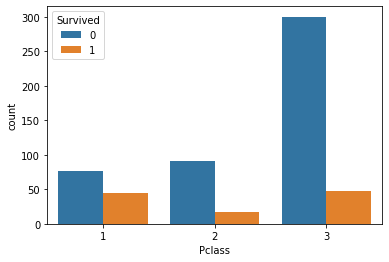

In [31]:
sns.countplot(x=a['Pclass'],hue=a['Survived'])

In [32]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,100.0,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,100.0,0,0,359309,8.0500,NaN,S,1


pclass 별 여성의 생존 수 

In [33]:

a = train[female]
a['Survived'].groupby(a['Pclass']).value_counts()

Pclass  Survived
1       1           91
        0            3
2       1           70
        0            6
3       0           72
        1           72
Name: Survived, dtype: int64

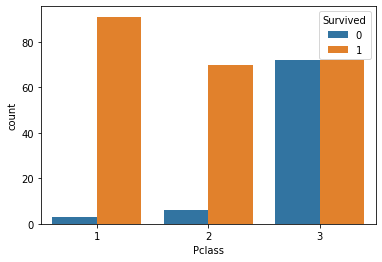

In [34]:
a= train[female & (fst | snd | thd)]

sns.countplot(data =a ,x='Pclass' ,hue=a['Survived'])

- 1등석과 2등석 여성 생존자의 비율이 많다
- 3등석은 여성이어도 사망자가 많다.

In [35]:
len(train[female & no_survived]), len(train[survived])

(81, 342)

In [0]:
train['thd_female'] = (female & thd).astype(int)
test['thd_female'] = (t_female & t_thd).astype(int)

# train['fst_female'] = (female & fst).astype(int)
# test['fst_female'] = (female & fst).astype(int)

# train['snd_female'] = (female & snd).astype(int)
# test['snd_female'] = (female & snd).astype(int)


In [37]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,thd_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,0


In [0]:
# train.loc[female & (fst | snd),'fst&snd_female'] =2
# train.loc[female & thd,'fst&snd_female'] = 1
# train.loc[male,'fst&snd_female'] = 0

# test.loc[female & (fst | snd),'fst&snd_female'] =2
# test.loc[female & thd,'fst&snd_female'] = 1
# test.loc[male,'fst&snd_female'] = 0

In [0]:
# test['fst&snd_female'].value_counts()

0    258
2     80
1     80
Name: fst&snd_female, dtype: int64

In [0]:
# train['fst&snd_female'] = female & (fst | snd)
# train['fst&snd_female']= train['fst&snd_female'].astype(int)

# test['fst&snd_female'] = female & (fst | snd)
# test['fst&snd_female']= test['fst&snd_female'].astype(int)


In [38]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,thd_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,0


In [39]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,thd_female
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0


eda 결과
- 남성은 대부분 죽었다
- 1등석에 탄 여성은 3명만 죽었고 2등석은 6명만 죽었다. 3등석은 반반

컬럼 추가
<!-- - fst&snd_female : 1등석과 2등석에 탑승한 여성 생존자 :1 , 아니면 :0   -->
- thd_female : 3등석에 탑승한 여성 사망자 : 1, 아니면 :0 

# preprocessing

In [0]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,f26_fstm,sndm_a15_f10,f50&a10,thd_female
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S,0,0,0,1,0


In [0]:
# feature = ['Pclass','Sex','Age','Fare','Embarked','no_kindred',
#            'f50&a10','thd_female','SibSp','Parch',
#            'f26_fstm','sndm_a15_f10',
# ]

# x_train = train[feature]
# y_train = train['Survived']

# x_test = test[feature]

선착장 onehot encoding

In [0]:
train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
no_kindred        0
f26_fstm          0
sndm_a15_f10      0
f50&a10           0
thd_female        0
dtype: int64

In [0]:
test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
no_kindred        0
f26_fstm          0
sndm_a15_f10      0
f50&a10           0
thd_female        0
dtype: int64

In [0]:
# x_test['Fare']= x_test['Fare'].fillna(x_test['Fare'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# embarked 결측치는 무난한 S로 채움
train['Embarked']=train['Embarked'].fillna('S')


In [0]:

train['embark_s']=  (S ).astype(int)
train['embark_q']= (Q ).astype(int)
train['embark_c'] =( C).astype(int)

test['embark_s']=( t_S).astype(int)
test['embark_q']= ( t_Q).astype(int)
test['embark_c'] =( t_C).astype(int)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,f26_fstm,sndm_a15_f10,f50&a10,thd_female,embark_s,embark_q,embark_c
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,0,1,0,0


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,f26_fstm,sndm_a15_f10,f50&a10,thd_female,embark_s,embark_q,embark_c
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,1,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,0,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,1,1,1,0,0


성별 onehot encoding

In [0]:

train['Sex']=train['Sex'].map({'male':0,'female':1})

test['Sex']=test['Sex'].map({'male':0,'female':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


pclass onehot encoding

In [0]:

train['Pclass_1'] = (fst).astype(int)
train['Pclass_2'] = (snd).astype(int)
train['Pclass_3'] = (thd).astype(int)

test['Pclass_1'] = (t_fst).astype(int)
test['Pclass_2'] = (t_snd).astype(int)
test['Pclass_3'] = (t_thd).astype(int)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,f26_fstm,sndm_a15_f10,f50&a10,thd_female,embark_s,embark_q,embark_c,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,0,1,0,0,0,0,1


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,f26_fstm,sndm_a15_f10,f50&a10,thd_female,embark_s,embark_q,embark_c,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1,0,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,1,1,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,0,0,1,0,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1,0,1,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,1,1,1,0,0,0,0,1


# Model

In [0]:
feature = ['Pclass_1','Pclass_2','Pclass_3','Sex','Age','Fare','embark_s','embark_q','embark_c','no_kindred','f50&a10','thd_female','SibSp','Parch','f26_fstm','sndm_a15_f10']
x_train = train[feature]
y_train = train['Survived']

x_test = test[feature]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5,n_jobs=-1,max_features=5)

# lr = LogisticRegression(n_jobs=-1,random_state=2020)


In [0]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
x_test.isnull().sum()

Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex             0
Age             0
Fare            1
embark_s        0
embark_q        0
embark_c        0
no_kindred      0
f50&a10         0
thd_female      0
SibSp           0
Parch           0
f26_fstm        0
sndm_a15_f10    0
dtype: int64

In [0]:
 x_test['Fare']= x_test['Fare'].fillna(x_test['Fare'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
y_pred= rf.predict(x_test)

In [0]:
subm = pd.read_csv('gender_submission.csv')
subm

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
subm['Survived']= y_pred
subm

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
subm.to_csv('./submissions/randomforest_clas_mf5_f15a10.csv',index=False)

# 제출 후 평가

logistic reg
- basic logistic regression 모델은 score 0.66
- 결측치 age를 100 값을 줌. score 0.732
- kindred 컬럼을 추가한 결과 score 0.736
- f50&a10 컬럼 추가한 결과 score 0.751
- fst&snd_female 컬럼 추가한 결과 score 0.67 - 감소했다.
- thd_female 컬럼 추가한 결과 score 0.756

random forest
- randomforest 모델 & 위 컬럼 모두 사용 score 0.789
- add SibSp & Parch col score 0.799 
- add sndm score 0.794 -minus





